# Assignment 9
## Due June 27th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

## Exercise 1: (Exact Recovery from PCA is not possible)

## a)

Since the compression matrix $ W $ reduces the dimension of $x$ $\in \mathbb{R}^n $ to a d-dimensional representation ($d<n$), the corresponding map is not injective. 

Proof by contradiction:

Assuming: 
$$u,v \in \mathbb{R}^n ; Wu = Wv \Rightarrow u= v$$

$$Wu_d = \sum_i^n W_{di} u_i ; Wv_d = \sum_i^n W_{di} v_i$$
$$Wu_d = Wv_d  \forall d $$

Let $v$ be a permutation of $u$ so that $v \neq u$
$$Wu_d = Wv_d  \forall d $$ 

still holds

Therefore $Wu = Wv \nRightarrow u= v$

## b)

The map is not injective, the projection is ambigous. Therefore it is impossible to recover from a linear compression exactly, since multiple different vectors get mapped to the same respresentation

# Exercise 2: PCA and Random Projections

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.testing import assert_equal, assert_almost_equal
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

In [11]:
# load the USPS dataset
usps_df = pd.read_csv('USPS.csv', sep='\t',)
xs_usps = usps_df.drop(['Label'], axis=1).values
ys_usps = usps_df['Label'].values

xs_usps.shape, ys_usps.shape

((1000, 256), (1000,))

#### Here you can implement PCA and Random Projections yourself. This will be awarded with 1.5 bonus points per method. If you decide to do so, you have to use your implementation in this exercise. If you do not want to implement this, simply remove the NotImplementedError().

In [12]:
# Your PCA and random projection implementation HERE (OPTIONAL)
# YOUR CODE HERE

### (a) Reduce the dataset's dimensionality to d=2

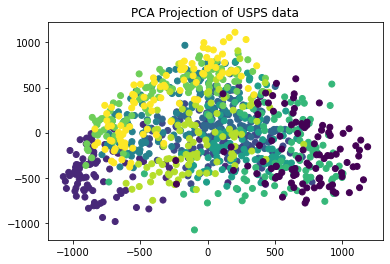

In [13]:
pca = PCA(n_components=2) # an np.array of shape 1000x2
pca = pca.fit(xs_usps)
xs_usps_pca = pca.transform(xs_usps)

plt.scatter(*xs_usps_pca.T, c=ys_usps)
plt.title('PCA Projection of USPS data')
plt.show()

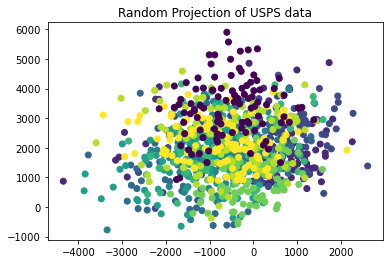

In [14]:
random = GaussianRandomProjection(n_components=2)
random.fit(xs_usps)
xs_usps_random = random.transform(xs_usps) # an np.array of shape 1000x2

# YOUR CODE HERE

plt.scatter(*xs_usps_random.T, c=ys_usps)
plt.title('Random Projection of USPS data')
plt.show()

### (b) Visualize prinicipal components and random directions

In [15]:
def reconstruct(xs_original, xs_projected):
    ''' Returns: A np.array of the same shape as xs_original
    '''

    dim = xs_projected.shape[1]
    R = np.zeros((256, dim))
    for i in range(256):
        R[i,:] = np.linalg.lstsq(xs_projected, xs_original[:,i], rcond=None)[0] 
    return (R @ xs_projected.T).T

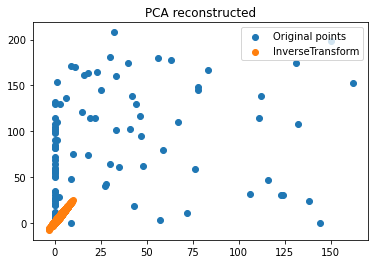

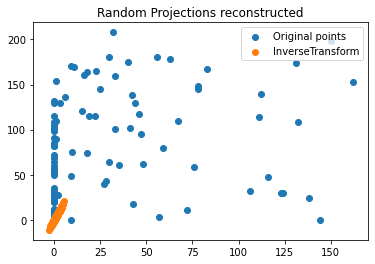

In [16]:
#fig, axis = plt.subplots(2, 2)

xs_inv = pca.inverse_transform(xs_usps_pca)
xs_random_inv = reconstruct(xs_usps, xs_usps_random)

plt.scatter(xs_usps[:, 0], xs_usps[:, 1], label='Original points')
plt.scatter(xs_inv[:, 0], xs_inv[:, 1], label='InverseTransform')
[plt.plot([xs_usps[i, 0], xs_usps[i, 0]], [xs_inv[i, 1], xs_inv[i, 1]]) for i in range(2)]
plt.legend()
plt.title('PCA reconstructed')
plt.show()

plt.scatter(xs_usps[:, 0], xs_usps[:, 1], label='Original points')
plt.scatter(xs_random_inv[:, 0], xs_random_inv[:, 1], label='InverseTransform')
[plt.plot([xs_usps[i, 0], xs_usps[i, 0]], [xs_random_inv[i, 1], xs_random_inv[i, 1]]) for i in range(2)]
plt.legend()
plt.title('Random Projections reconstructed')
plt.show()

### (c) Visualize reconstructed images

In [17]:
# assert correctness of reconstruct
np.random.seed(42)
W = np.random.normal(size=(256,2))/np.sqrt(2)
xs_reconstructed = reconstruct(xs_usps, xs_usps @ W)
assert_almost_equal(np.linalg.norm(xs_reconstructed), 28102.566390212647)

random_projection = GaussianRandomProjection(n_components=256)
xs_usps_random = random_projection.fit_transform(xs_usps)
assert (xs_usps - reconstruct(xs_usps, xs_usps_random)).max() < 1e-8

256


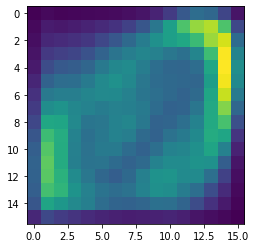

In [18]:
# we want to reconstruct digit number 100 - visualize it
digit = xs_inv[100,:]
print(len(digit))
plt.imshow(digit.reshape(16, 16))
plt.show()

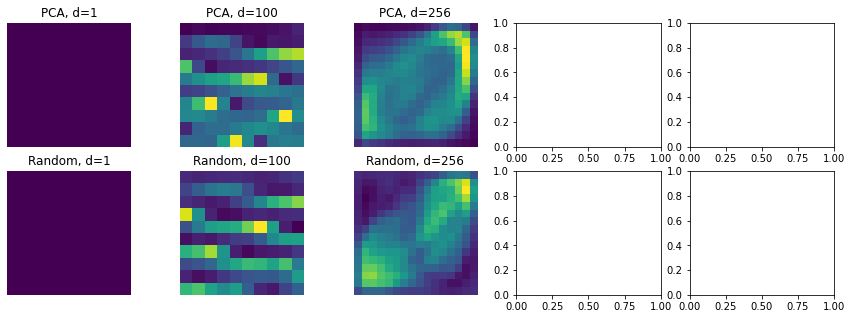

In [19]:
dimensions = [1, 100, 256] # don´t know how to plot  10, 50 dimensions because auf np.sqrt(l)
fig, axis = plt.subplots(2, 5, figsize=(15,5))

for idx, dim in enumerate(dimensions):
    # YOUR CODE HERE
    digit_pca = xs_inv[100, :dim]
    digit_random = xs_random_inv[100, :dim]
    n_size = int(np.sqrt(dim))
    axis[0, idx].imshow(digit_pca.reshape(n_size, n_size))
    axis[1, idx].imshow(digit_random.reshape(n_size, n_size))
    axis[0, idx].set_title(f'PCA, d={dim}')
    axis[0, idx].axis('off')
    axis[1, idx].set_title(f'Random, d={dim}')
    axis[1, idx].axis('off')

plt.show()

### (d) Reconstruction Error of PCA and Random Projections

[2048296.993305459, 968743.7636591566, 573276.3816075264, 231025.52220870036, 99979.52194127793, 35719.72142797713, 1.5151713554670533e-17]


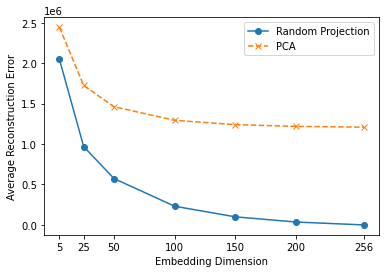

In [28]:
dimensions = [5, 25, 50, 100, 150, 200, 256]

def dim_reduction_errors(data_x, data_y, method, dims):
    errors = []
    for dim in dims:
        reduction = method(n_components=dim)
        reduction.fit(data_x)
        reduction_trans = reduction.transform(data_x)
        
        xs_projected = reconstruct(xs_usps, reduction_trans)

        errors.append(np.sum((xs_usps - xs_projected) ** 2, axis=1).mean())
    return errors


errors_pca = dim_reduction_errors(xs_usps, ys_usps, PCA, dimensions)
errors_random = dim_reduction_errors(xs_usps, ys_usps, GaussianRandomProjection, dimensions)
# YOUR CODE HERE

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

### (e) Average and maximum distortion of distances

In [71]:
def pairwise_distortions(xs_orig, xs_new):
    distortion = np.empty(xs_orig.shape)
    for i in range(0,xs_orig.shape[0]):
        for j in range(0,xs_orig.shape[1]):
            if i != j:
                orig_dist = np.linalg.norm(xs_orig[i,j] - xs_orig[i,j])
                new_dist = np.linalg.norm(xs_new[i,j] - xs_new[i,j])
                distortion[i,j] = np.max([orig_dist/new_dist, new_dist/xs_orig])
            else:
                distortion[i,j] = 0

    return distortion


def average_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).mean()
    
def maximum_distortion(xs_orig, xs_new):
    return pairwise_distortions(xs_orig, xs_new).max()

In [72]:
xs_orig = np.arange(10).reshape(-1, 1)
xs_new = xs_orig * xs_orig
pairwise_distortions(xs_orig, xs_new)

print(average_distortion(xs_orig, xs_orig))
# checking correctness of distortion functions
assert_almost_equal(average_distortion(xs_orig, xs_orig), 1.)
assert_almost_equal(maximum_distortion(xs_new, xs_new), 1.)
assert_almost_equal(average_distortion(xs_orig, xs_new), 9.)
assert_almost_equal(maximum_distortion(xs_orig, xs_new), 17.)
p_usps = pairwise_distortions(xs_usps, PCA(2).fit_transform(xs_usps))
assert_equal(p_usps.shape, (499500, ))

/var/folders/vg/z73dz98x1t195mdfkwgykc580000gn/T/ipykernel_99729/3158931505.py:8: RuntimeWarning: invalid value encountered in double_scalars
  distortion[i,j] = np.max([orig_dist/new_dist, new_dist/xs_orig])
/var/folders/vg/z73dz98x1t195mdfkwgykc580000gn/T/ipykernel_99729/3158931505.py:8: RuntimeWarning: invalid value encountered in true_divide
  distortion[i,j] = np.max([orig_dist/new_dist, new_dist/xs_orig])
/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
dimensions = [5, 10, 25,  50]

avg_distortion_pca = ...
avg_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = ...
max_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()


NameError: name 'plt' is not defined

### (f) Multiply the first dimension of the data by 500 and repeat (d) and (e).

In [ ]:
errors_pca = ... 
errors_random = ...

#YOUR CODE HERE

plt.plot(dimensions, errors_random, 'o-', label='Random Projection')
plt.plot(dimensions, errors_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Reconstruction Error')
plt.legend(loc='best')
plt.show()

In [ ]:
avg_distortion_pca = ...
avg_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, avg_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, avg_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Average Distortion')
plt.legend(loc='best')
plt.show()

max_distortion_pca = ...
max_distortion_random = ...

# YOUR CODE HERE

plt.plot(dimensions, max_distortion_random, 'o-', label='Random Projection')
plt.plot(dimensions, max_distortion_pca, 'x--', label='PCA')
plt.xlabel('Embedding Dimension')
plt.xticks(dimensions)
plt.ylabel('Maximum Distortion')
plt.legend(loc='best')
plt.show()

### (g) Summarize the advantages and disadvantages of PCA and Random Projections

PCA and Random Projection are a good way to perform dimensionality reduction and to gain a beter human understandable overview of the data. However, only in the cases where we have just few dimensions with significant influence it works well. 
They can also helfp to identify and eliminate dependent or redundant features

# Exercise 3: Kernel PCA

In [ ]:
from sklearn.gaussian_process.kernels import RBF

def get_circle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [ ]:
data = np.concatenate([get_circle_data(100, 2),
                       get_circle_data(100, 4),
                       get_circle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

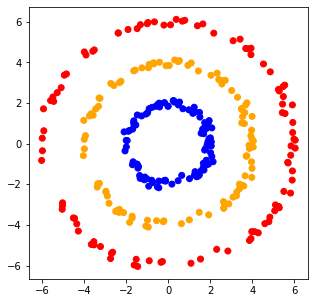

In [ ]:
fig = plt.figure()
fig.set_size_inches((5,5))
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

## a)

In [ ]:
def kernel_PCA(xs, kernel, l=2):
    
   # YOUR CODE HERE

## b)

In [ ]:
# apply kernel PCA and 2d plot

# YOUR CODE HERE

In [ ]:
# 3d plot

# YOUR CODE HERE